# Overview

This notebook deals with the analysis of the data. The following questions were investigated:

- [Which programming languages are most commonly used?](#languages)
- [Which tools are used most frequently?](#tools)
- [Which Python libraries are most commonly used?](#libraries)
- [Where and how often is machine learning used in the industry?](#machine_learning)
- [What soft skills are most often required?](#soft_skills)
- [What degrees are required?](#degrees)
- [How much work experience is required?](#experience)
- [Does the size of a company have an impact on the positions being sought?](#company_size)
- [Which attributes increase the home office probability?](#home_office)
- [In which regions of Germany are most Data Science jobs offered?](#regions)
- [Which companies search the most for new data roles?](#company)
- [Which attributes influence the salary of a job?](#salary)

All plots generated with Plotly are actually interactive. However, since Github cannot render dynamic content, the plots were all converted to a static format using fig.show("svg"). To access the interactive features of the plots, they must be displayed with fig.show() instead.

In [1]:
import warnings

import numpy as np
import pandas as pd
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
df_wide = pd.read_csv("../data/data_wide.csv")
df_wide = df_wide.loc[df_wide["title_category"] != "Others"]
df_wide.head()

,link,company,title,content,rating,num_ratings,company_link,release_date,company_size,permanent_employment,...,creativity,leadership,flexibility,business_focus,initiative,structured_working,little_experience,much_experience,no_experience_information,some_experience
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,True,...,False,False,False,False,False,False,False,False,True,False
1,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Direkter geht Karriere nicht.Einstieg bei der ...,4.3,16 Bewertungen,NaN,2022-06-03,NaN,True,...,False,False,False,False,False,False,False,False,True,False
2,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Direkter geht Karriere nicht.Einstieg bei der ...,4.3,16 Bewertungen,NaN,2022-06-03,NaN,True,...,False,False,False,False,False,False,False,False,True,False
3,https://www.stepstone.de/stellenangebote--Data...,METRO Markets GmbH,Data Science Lead,We create the future of B2B commerce by giving...,NaN,NaN,NaN,2022-06-01,NaN,True,...,False,False,True,False,False,False,False,True,False,False
4,https://www.stepstone.de/stellenangebote--Busi...,R+V Allgemeine Versicherung AG,Business Analyst / Data Science (m/w/d),Wie sich die Versicherung von morgen anfühlen ...,4.4,247 Bewertungen,https://www.stepstone.de/cmp/de/R-V-Allgemeine...,2022-06-01,"10,001+",True,...,False,False,False,False,True,False,False,False,True,False


In [3]:
df_wide.columns

Index(['link', 'company', 'title', 'content', 'rating', 'num_ratings',
       'company_link', 'release_date', 'company_size', 'permanent_employment',
       ...
       'creativity', 'leadership', 'flexibility', 'business_focus',
       'initiative', 'structured_working', 'little_experience',
       'much_experience', 'no_experience_information', 'some_experience'],
      dtype='object', length=103)

The data contains a number of different attributes. However, for many of the following analyses, only a subset of the attributes is needed. Therefore, an additional column index is introduced at this point, which divides the attributes into different groups and allows for easier filtering.

In [4]:
groups = 21*["general_info"] + 18*["languages"] + 19*["tools"] + 14*["libraries"] + 4*["education"] + 5*["degree"] + 8*["knowledge"] + 10*["soft_skills"] + 4*["experience"]
df_wide.columns = pd.MultiIndex.from_arrays([groups, df_wide.columns])
df_wide.head(1)

general_info                     \
                                                link            company   
0  https://www.stepstone.de/stellenangebote--Anal...  BearingPoint GmbH   

                                                      \
                                               title   
0  Analyst Data Science & Artificial Intelligence...   

                                                                              \
                                             content rating      num_ratings   
0  Design your own career.Make your point @ Beari...    3.9  312 Bewertungen   

                                                                   \
                                        company_link release_date   
0  https://www.stepstone.de/cmp/de/BearingPoint-G...   2022-06-03   

                                     ... soft_skills                         \
  company_size permanent_employment  ...  creativity leadership flexibility   
0    2501-5000                 True  ...       False      False       False   

                                                      experience  \
  business_focus initiative structured_working little_experience   
0          False      False              False             False   

                                                             
  much_experience no_experience_information some_experience  
0           False                      True           False  

[1 rows x 103 columns]

<a id="languages"></a>

## Which programming languages are most commonly used?

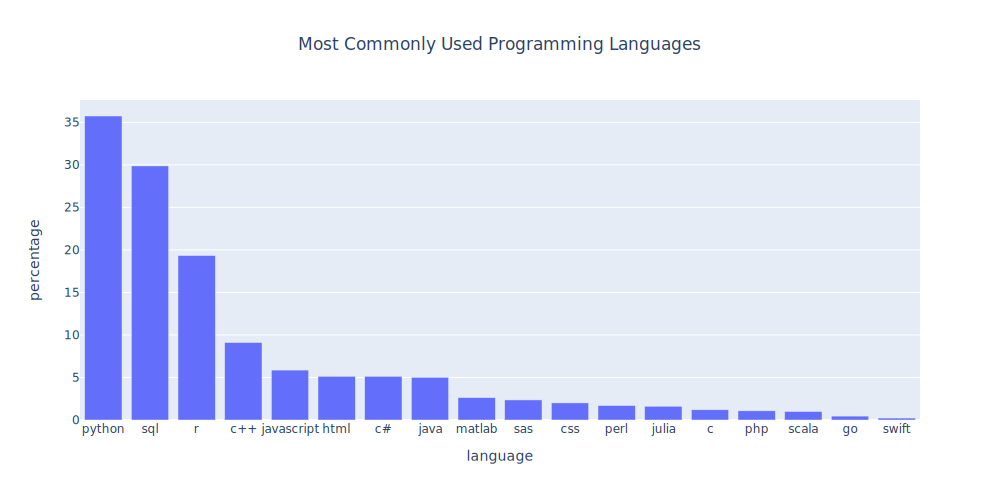

In [5]:
percentages = df_wide["languages"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "language"}, width=1000, height=500,
             title="Most Commonly Used Programming Languages")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

For the sake of clarity, only the most common categories are used in the following and in all further analyses for the subdivision into different job titles.

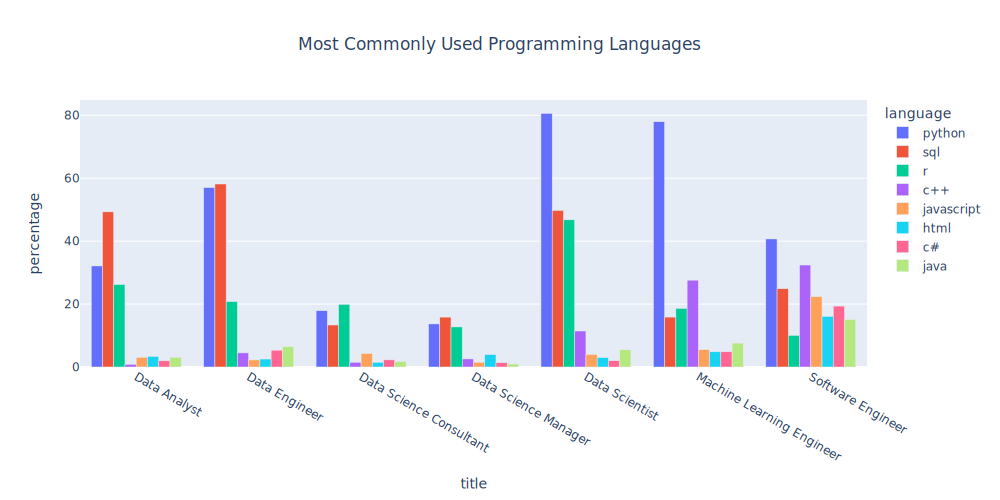

In [6]:
df_selected = df_wide["languages"][["python", "sql", "r", "c++", "javascript", "html", "c#", "java"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "language"}, width=1000, height=500,
             title="Most Commonly Used Programming Languages")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- programming languages used vary widely between job titles
- Python, R and Sql are most commonly used regardless of job title
    - however, in jobs with a greater focus on programming, such as Machine Learning Engineer or Software Engineer, Python is preferred over R
    - in positions as analyst, consultant or manager, the distribution is balanced
- other programming languages are generally much less widespread
    - only as Machine Learning Engineer or Software Engineer other languages like C++ are expected in some cases

<a id="tools"></a>

## Which tools are most commonly used?

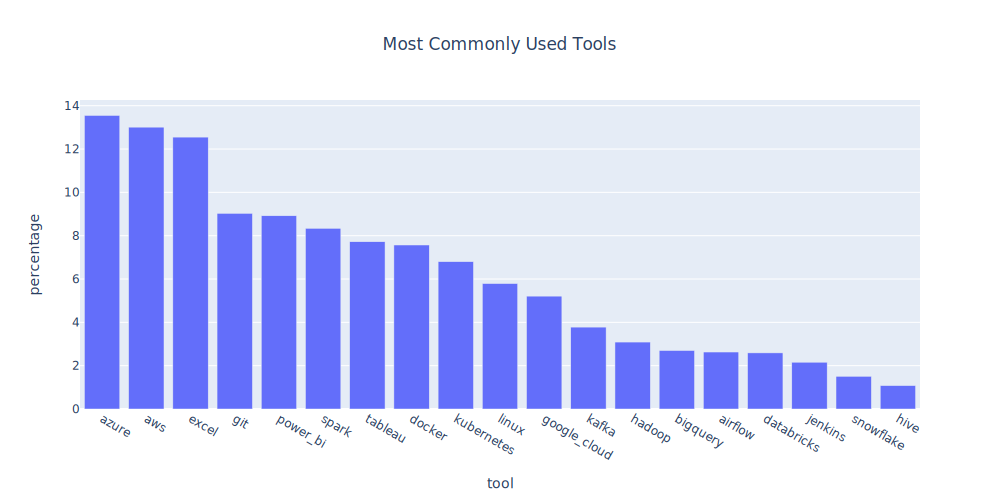

In [7]:
percentages = df_wide["tools"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "tool"}, width=1000, height=500, title="Most Commonly Used Tools")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

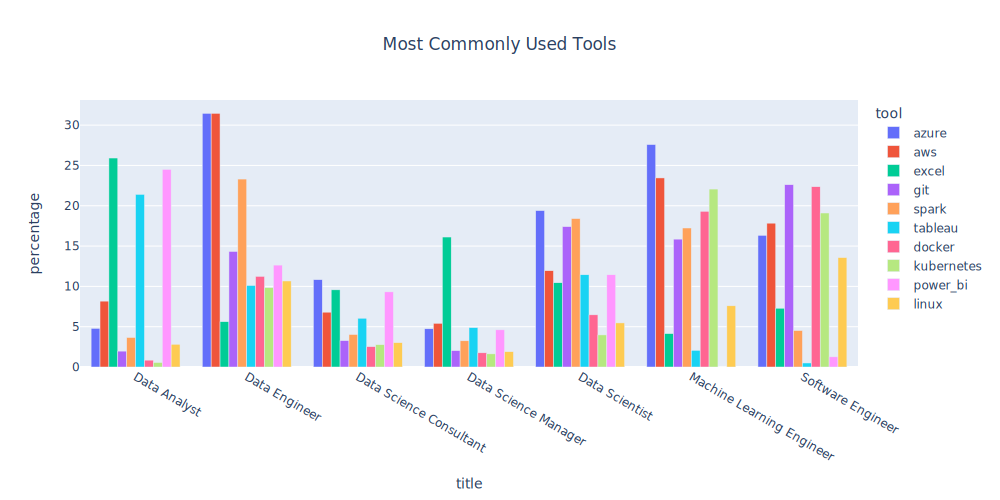

In [8]:
df_selected = df_wide["tools"][["azure", "aws", "excel", "git", "spark", "tableau", "docker", "kubernetes", "power_bi", "linux"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "tool"}, width=1000, height=500,
             title="Most Commonly Used Tools")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- with regard to the tools used, three rough groups can be divided
    - for a data engineer, data scientist, machine learning engineer or software engineer, mastery of many different tools is required
        - a platform for cloud computing (e.g., Azure or AWS).
        - Git for version control and collaboration with other team members
        - Frameworks for processing huge amounts of data (e.g., Spark)
        - Frameworks for containerization (Docker and Kubernetes)
    - for a data science consultant or data science manager, tools are rather secondary
    - as a data analyst, software for visualizing data (Tableau, Power BI or Excel) is needed most of all

<a id="libraries"></a>

## Which Python libraries are most commonly used?

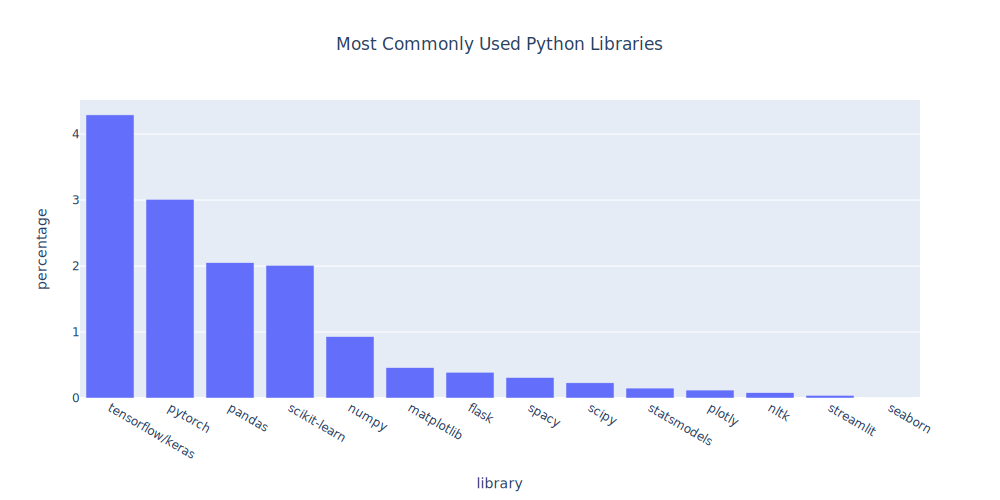

In [9]:
percentages = df_wide["libraries"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "library"}, width=1000, height=500,
             title="Most Commonly Used Python Libraries")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

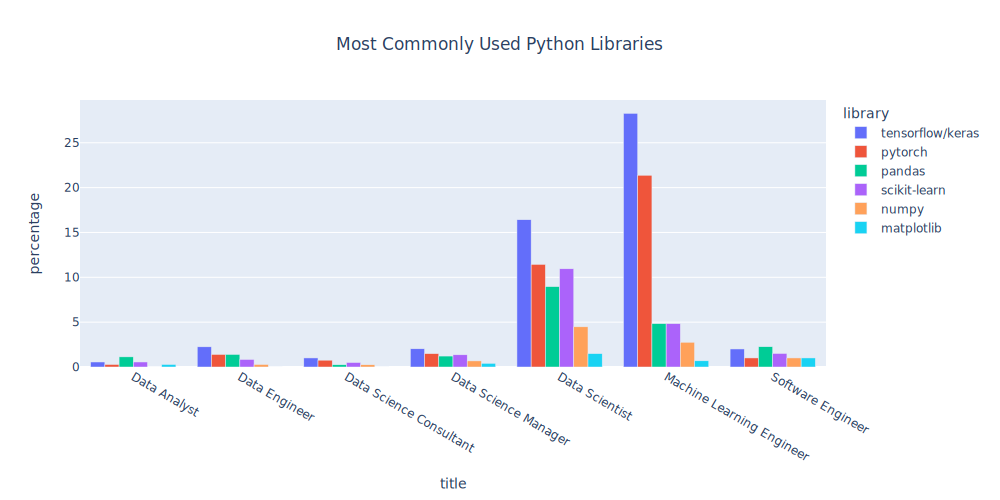

In [10]:
df_selected = df_wide["libraries"][["tensorflow/keras", "pytorch", "pandas", "scikit-learn", "numpy", "matplotlib"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "library"}, width=1000, height=500,
             title="Most Commonly Used Python Libraries")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- only a small percentage of job ads include Python libraries 
    - however, it may be that some ads already include them under Python and therefore do not explicitly mention them again
- only for Data Scientists and Machine Learning Engineers certain libraries are regularly requested
    - Deep Learning Libraries like Tensorflow/Keras and Pytorch
        - Tensorflow currently still has the upper hand here
    - Pandas for efficient data manipulation
    - Scikit-Learn for classic machine learning models

<a id="machine_learning"></a>

## Where and how often is machine learning used in the industry?

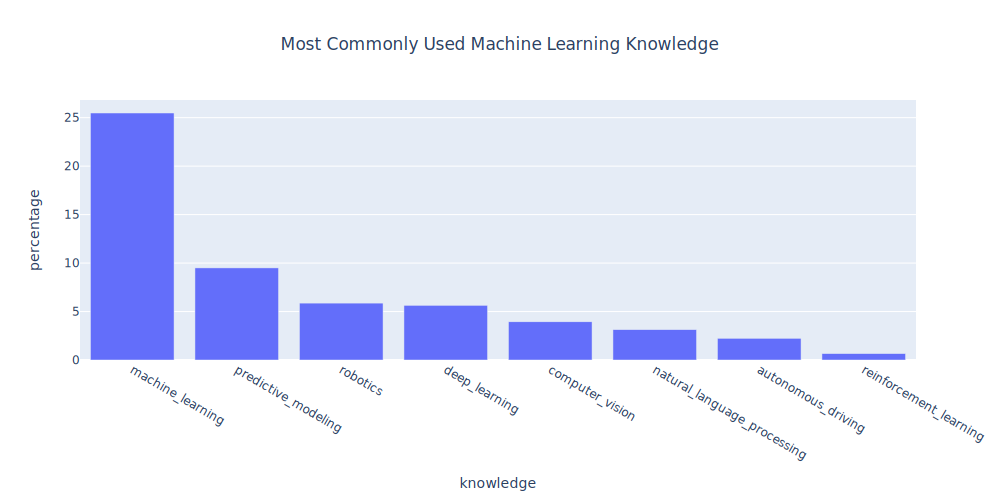

In [11]:
percentages = df_wide["knowledge"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "knowledge"}, width=1000, height=500,
             title="Most Commonly Used Machine Learning Knowledge")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

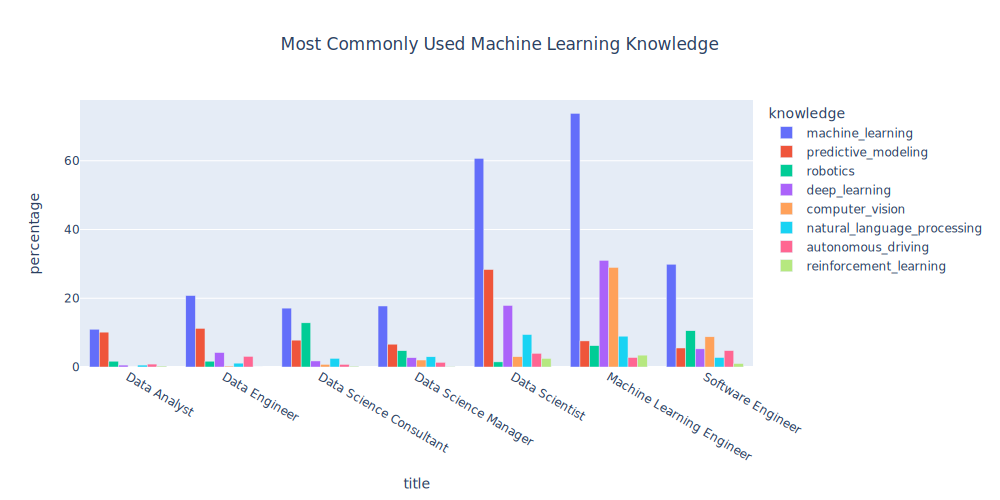

In [12]:
df_selected = df_wide["knowledge"][["machine_learning", "predictive_modeling", "robotics", "deep_learning", "computer_vision",
                                    "natural_language_processing", "autonomous_driving", "reinforcement_learning"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "knowledge"}, width=1000, height=500,
             title="Most Commonly Used Machine Learning Knowledge")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- Machine Learning is only mentioned in a quarter of the job advertisements
    - for Data Scientists and Machine Learning Engineers, however, this topic is much more relevant than for other jobs
- only one fifth of these Machine Learning applications are Deep Learning applications
    - the majority of current applications are currently related to predictive modeling using classical algorithms
    - only among the Machine Learning Engineers are there several job advertisements that apply Deep Learning in the area of computer vision.

<a id="soft_skills"></a>

## What soft skills are most often required?

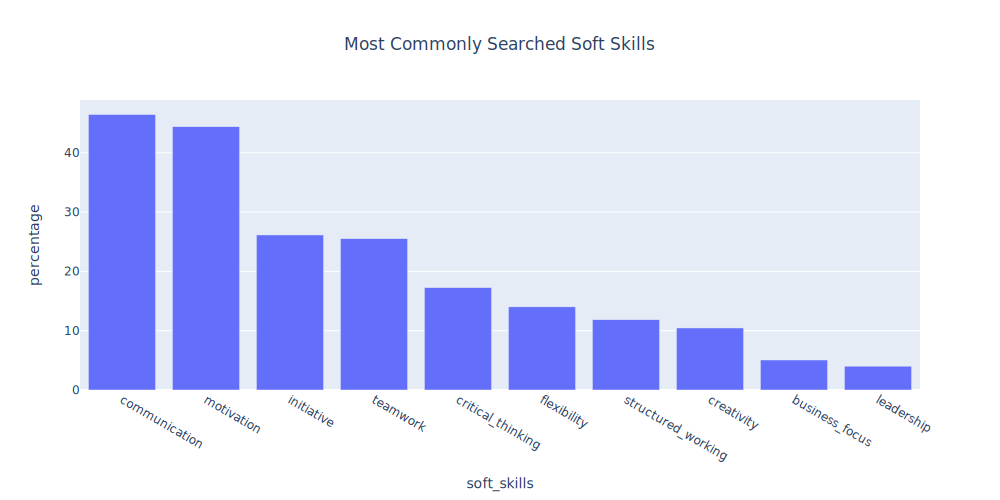

In [13]:
percentages = df_wide["soft_skills"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "soft_skills"}, width=1000, height=500,
             title="Most Commonly Searched Soft Skills")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

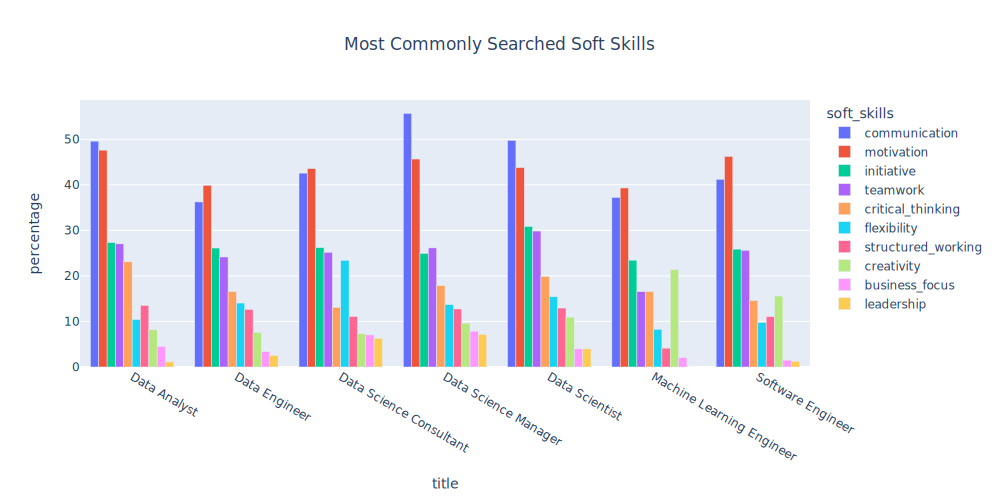

In [14]:
df_selected = df_wide["soft_skills"][["communication", "motivation", "initiative", "teamwork", "critical_thinking", "flexibility", 
                                      "structured_working", "creativity", "business_focus", "leadership"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "soft_skills"}, width=1000, height=500,
             title="Most Commonly Searched Soft Skills")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- the most frequently required soft skills are communication and motivation, followed by initiative and teamwork
    - the distribution of soft skills is very similar for all positions
- smaller deviations exist, however
    - for Data Science Managers, communication, business focus and leadership are required comparatively more often than for other jobs
    - for a Consultant, flexibility (e.g. willingness to travel) is in the foreground
    - It is also noticeable that creativity is comparatively often required for Machine Learning Engineers.
- overall, it is difficult to identify clear differences in soft skills, as these are always desirable, regardless of the exact position.

<a id="degrees"></a>

## What degrees are required?

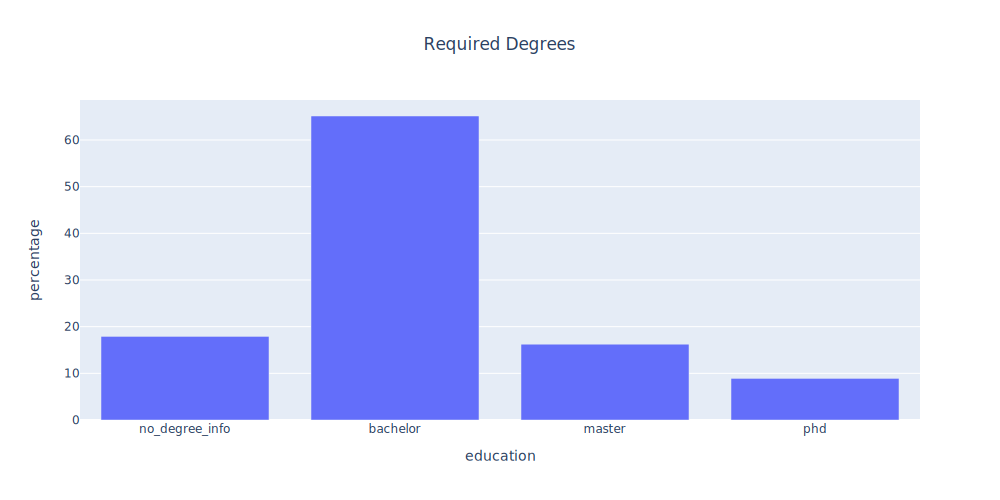

In [15]:
percentages = df_wide["education"][["no_degree_info", "bachelor", "master", "phd"]].mean().apply(lambda x: round(x*100,2))
fig = px.bar(percentages, labels={"value": "percentage", "index": "education"}, width=1000, height=500,
             title="Required Degrees")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

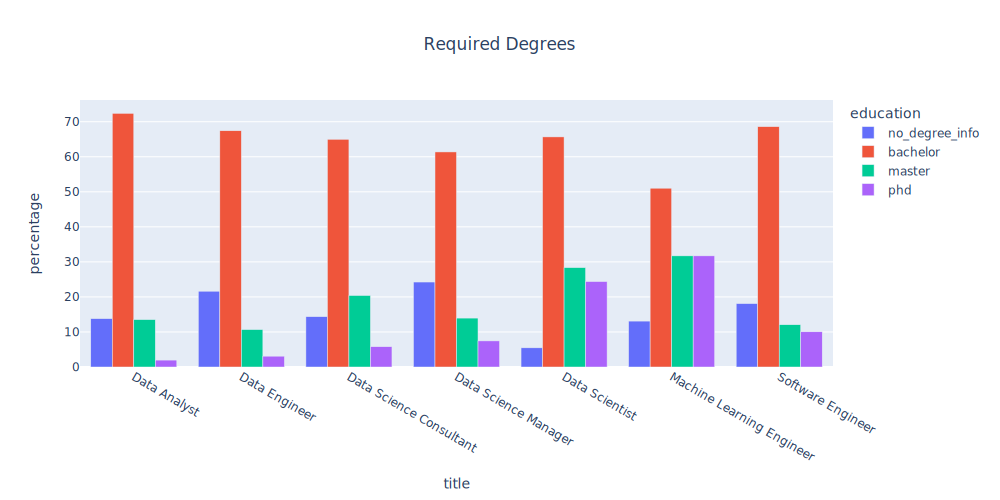

In [16]:
df_selected = df_wide["education"][["no_degree_info", "bachelor", "master", "phd"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "education"}, width=1000, height=500,
             title="Required Degrees")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- a degree is required for a majority of the positions
    - the ratio between bachelor and master is unfortunately not representative in this analysis
        - all job advertisements that only require a degree have been classified under "bachelor".
        - theoretically, however, a master's degree can also be meant in some cases
- the distribution of requirements is relatively similar between the job titles
    - it is noticeable that a Master's degree or Phd is explicitly required comparatively often for Data Scientist and Machine Learning Engineer.

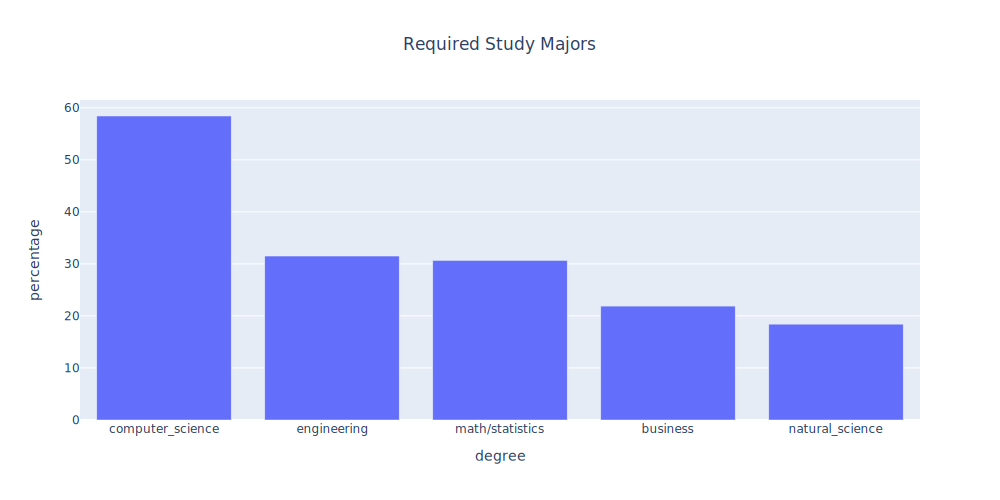

In [17]:
percentages = df_wide["degree"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "degree"}, width=1000, height=500, title="Required Study Majors")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

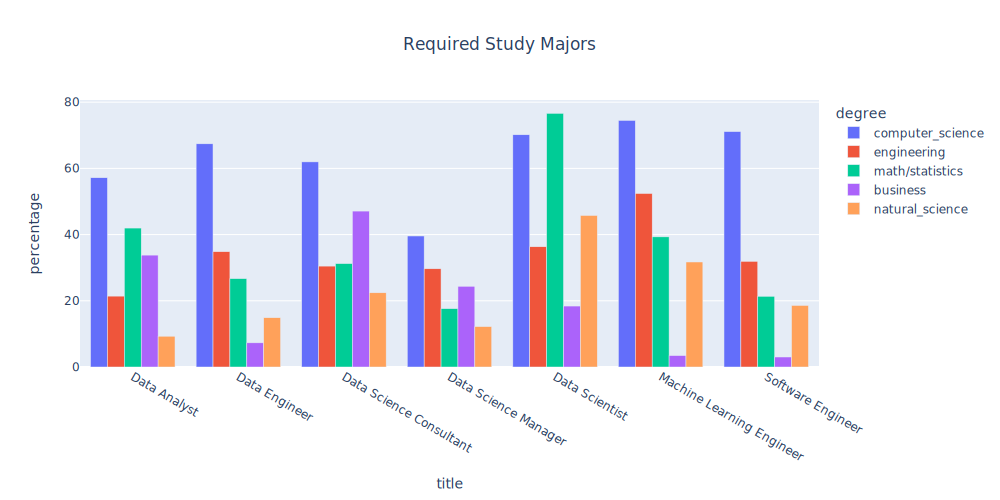

In [18]:
df_selected = df_wide["degree"][["computer_science", "engineering", "math/statistics", "business", "natural_science"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "degree"}, width=1000, height=500,
             title="Required Study Majors")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- a Computer Science degree is the best choice to get a Data Science job
- of course, a Data Science degree would also be acceptable for most jobs
    - since the term "Data Science" occurs several times in most job descriptions anyway, it would be difficult to extract only those occurrences that refer to a degree program
- for the job of a Data Scientist, a comparatively high value is placed on mathematics/statistics skills
- a business degree is particularly suitable for employment as a consultant, manager or analyst

 <a id="experience"></a>

## How much work experience is required?

Because of the relatively small sample sizes for exact years, work experience was divided into three categories during preprocessing:
- little experience: 0-2 years
- some experience: 3-4 years
- much experience: 5+ years

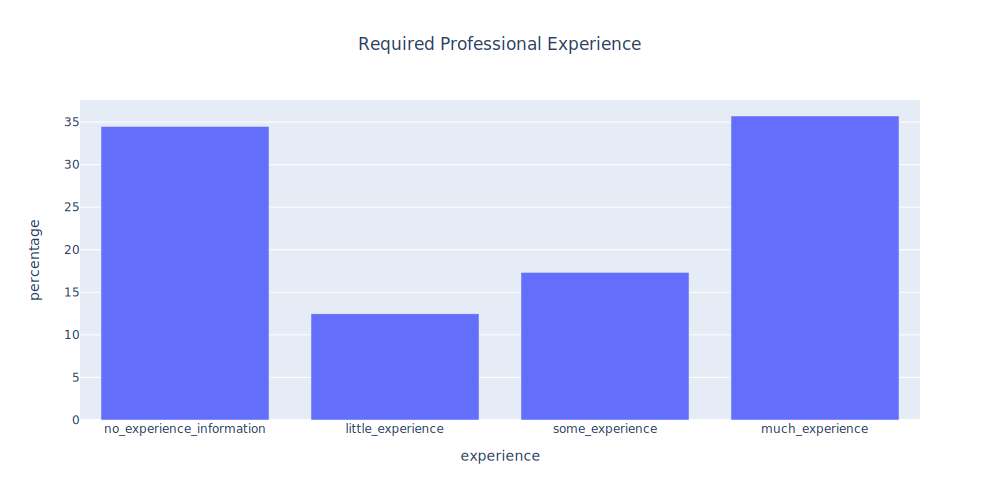

In [19]:
percentages = (df_wide["experience"][["no_experience_information", "little_experience", "some_experience", "much_experience"]]
               .mean().apply(lambda x: round(x*100,2)))
fig = px.bar(percentages, labels={"value": "percentage", "index": "experience"}, width=1000, height=500,
             title="Required Professional Experience")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

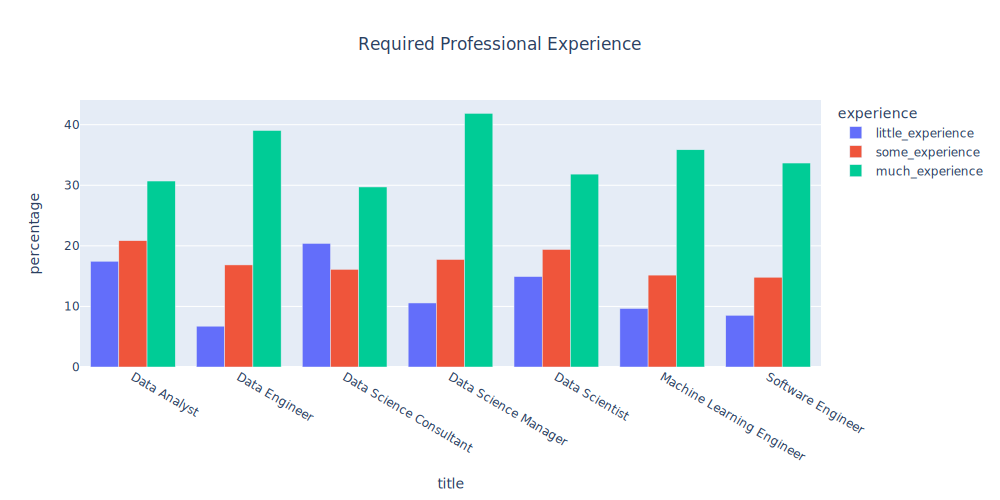

In [20]:
df_selected = df_wide["experience"][["little_experience", "some_experience", "much_experience"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "experience"}, width=1000, height=500,
             title="Required Professional Experience")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- the distribution of work experience is very similar for all job titles
    - Applicants with longer work experience are increasingly sought after
- as an entry-level employee, you have the best chances to start as a data analyst or data science consultant.
- it is interesting to note that even some managerial positions require only little work experience.

<a id="company_size"></a>

## Does the size of a company have an impact on the positions being sought?

In [21]:
df_wide = df_wide.droplevel(0, axis=1)
df_wide.head(1)

,link,company,title,content,rating,num_ratings,company_link,release_date,company_size,permanent_employment,...,creativity,leadership,flexibility,business_focus,initiative,structured_working,little_experience,much_experience,no_experience_information,some_experience
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,True,...,False,False,False,False,False,False,False,False,True,False


In [22]:
df_wide["company_size"].value_counts()

10,001+        1039
2501-5000       231
1001-2500       172
5001-10,000     155
51-250          117
251-500         107
501-1000        100
0-50             42
Name: company_size, dtype: int64

In [23]:
size_groups = df_wide["company_size"].map({"10,001+": "big", "5001-10,000": "medium", "2501-5000": "medium", "1001-2500": "medium", 
                                           "501-1000": "small", "251-500": "small", "51-250": "small", "0-50": "small"})

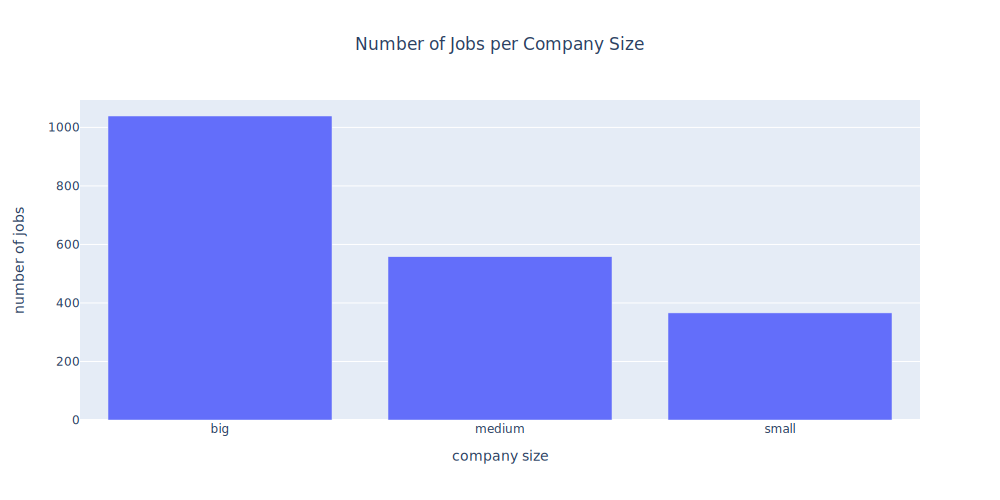

In [24]:
fig = px.bar(size_groups.value_counts(), labels={"value": "number of jobs", "index": "company size"}, width=1000, height=500,
             title="Number of Jobs per Company Size")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

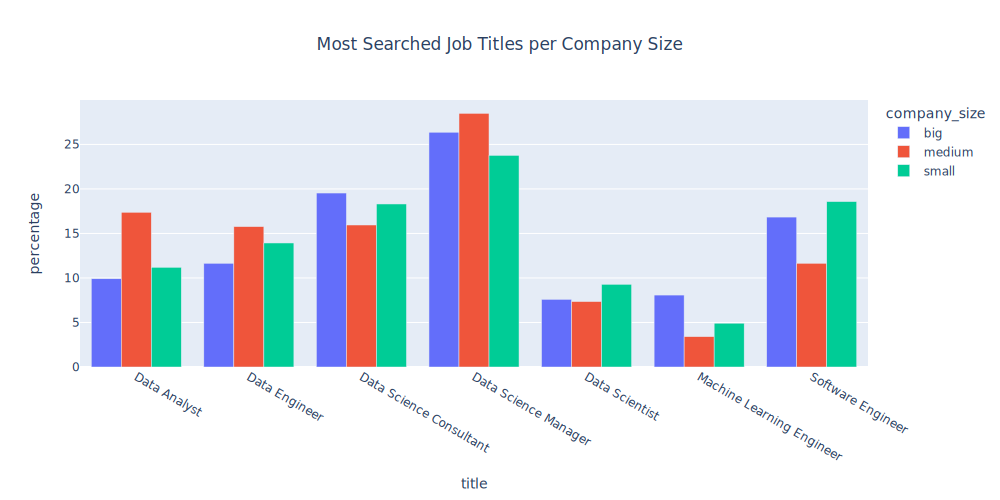

In [25]:
# Normalization over the company size ==> all bars of one color sum up to 100 percent
percentages = pd.crosstab(df_wide["title_category"], size_groups, normalize="columns").apply(lambda x: round(x*100, 2))
fig = px.bar(percentages, barmode="group", labels={"value": "percentage", "title_category": "title"}, width=1000, height=500,
             title="Most Searched Job Titles per Company Size")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- at first glance, no relevant pattern can be identified
- medium-sized companies are comparatively often looking for data analysts, while small and large companies are looking more for machine learning engineers and software engineers

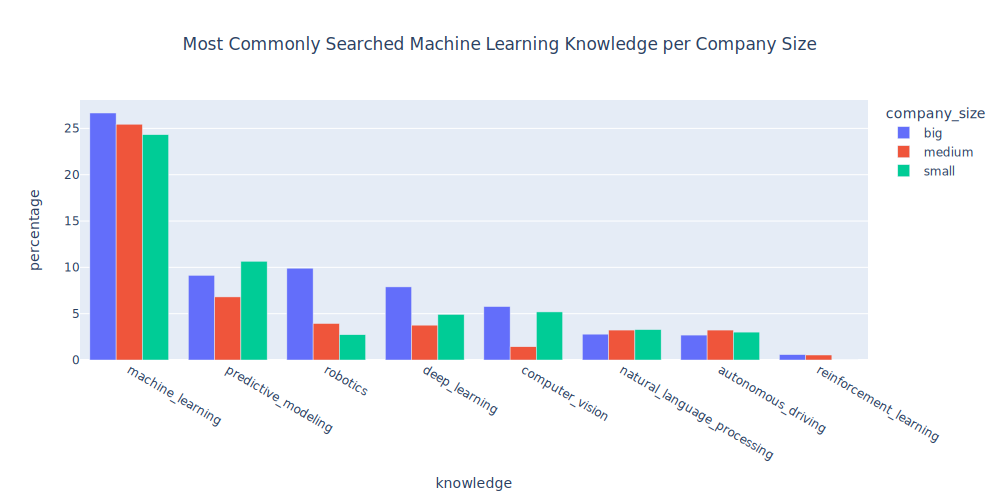

In [26]:
percentages = (df_wide.groupby(size_groups)[["machine_learning", "predictive_modeling", "robotics", "deep_learning", "computer_vision", 
                                            "natural_language_processing", "autonomous_driving", "reinforcement_learning"]]
               .mean().apply(lambda x: round(x*100,2)))
fig = px.bar(percentages.T, barmode="group", labels={"value": "percentage", "index": "knowledge"}, width=1000, height=500,
             title="Most Commonly Searched Machine Learning Knowledge per Company Size")
fig.update_layout(title={"x": 0.5})
fig.show("svg")

Summary:
- on average, larger companies are looking for slightly more jobs with knowledge in machine learning
- however, it is interesting to see that small companies offer more jobs in predictive modeling, deep learning and computer vision than medium sized ones

<a id="home_office"></a>

## Which attributes increase the home office probability?

In [27]:
mean = df_wide["home_office_possible"].mean()*100
mean

38.108108108108105

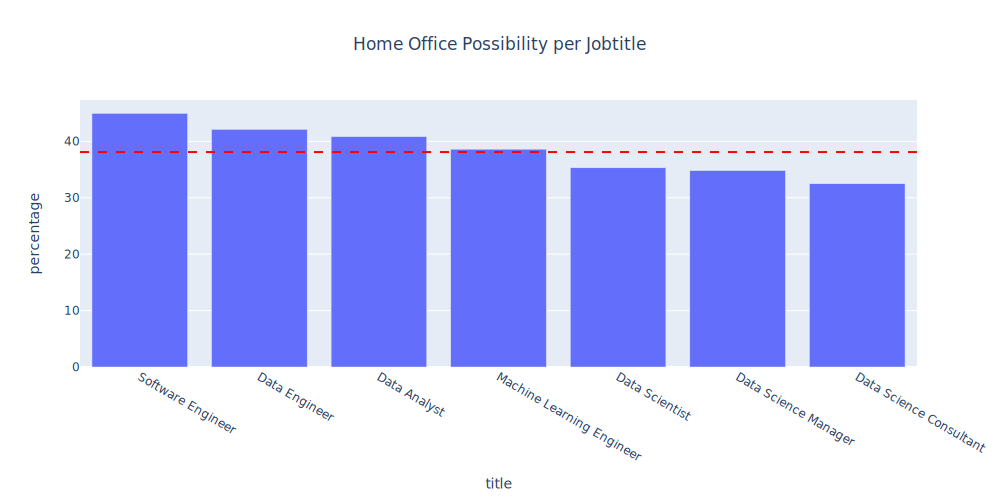

In [28]:
fig = px.bar(df_wide.groupby("title_category")["home_office_possible"].mean().sort_values(ascending=False).apply(lambda x: round(x*100,2)), 
             labels={"value": "percentage", "title_category": "title"}, width=1000, height=500, title="Home Office Possibility per Jobtitle")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.add_hline(y=mean, line_color="red", line_dash="dash")
fig.show("svg")

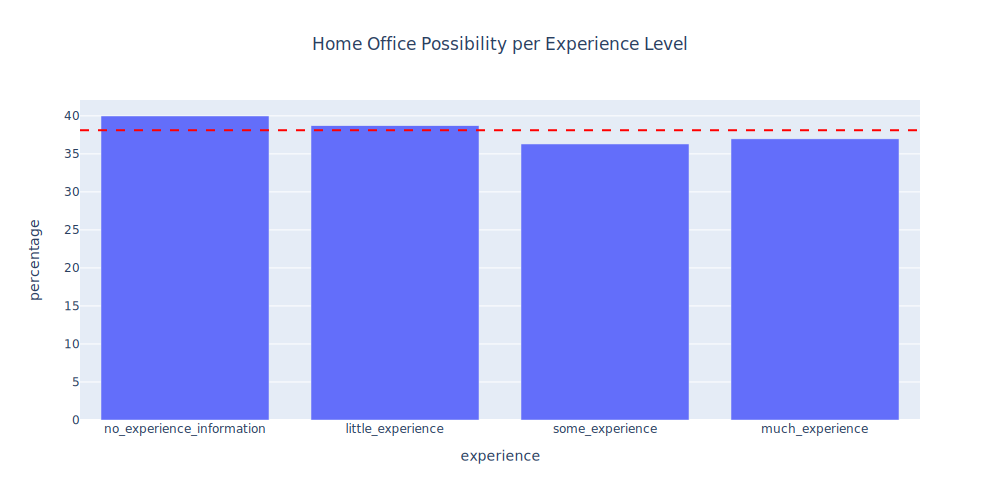

In [29]:
experience = df_wide[["no_experience_information", "little_experience", "some_experience", "much_experience"]].idxmax(axis=1)
percentages = (df_wide.groupby(experience)["home_office_possible"].mean().apply(lambda x: round(x*100,2))
               [["no_experience_information", "little_experience", "some_experience", "much_experience"]])
fig = px.bar(percentages, labels={"value": "percentage", "index": "experience"}, width=1000, height=500,
             title="Home Office Possibility per Experience Level")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.add_hline(y=mean, line_color="red", line_dash="dash")
fig.show("svg")

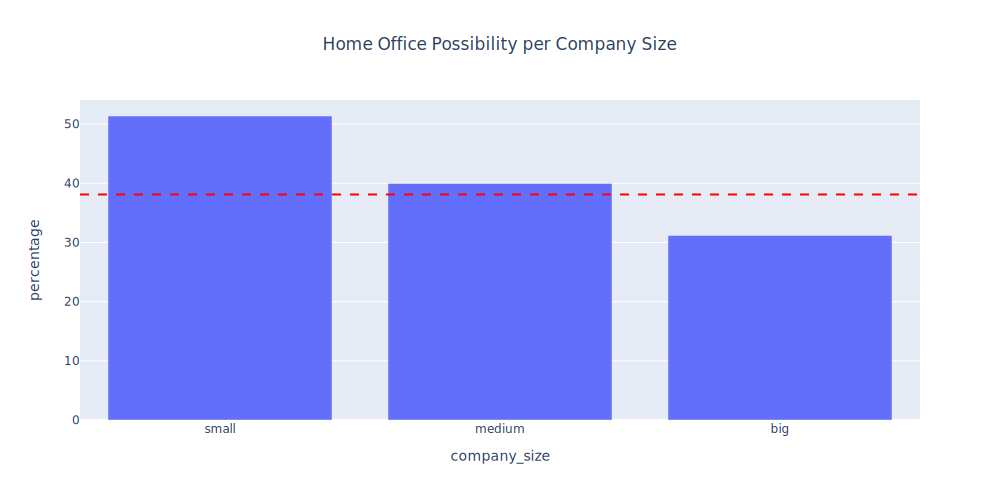

In [30]:
fig = px.bar(df_wide.groupby(size_groups)["home_office_possible"].mean().sort_values(ascending=False).apply(lambda x: round(x*100,2)),
             labels={"value": "percentage"}, width=1000, height=500, title="Home Office Possibility per Company Size")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.add_hline(y=mean, line_color="red", line_dash="dash")
fig.show("svg")

Summary:
- there are noticeable differences between the different job titles regarding home office
- the experience level of the person has hardly any influence on the possibility for home office
- the smaller the company, the higher the chance to do the job in the home office

<a id="regions"></a>

## In which regions of Germany are most Data Science jobs offered?

In [31]:
df_long = pd.read_csv("../data/data_long.csv")
df_long.head()

,link,company,title,content,industry,rating,num_ratings,company_link,release_date,company_size,...,home_office_possible,part_time,full_time,title_category,experience_level,average_salary,location,latitude,longitude,region
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
1,https://www.stepstone.de/stellenangebote--SAP-...,SAP SE,SAP IT Technology Consultant (f/m/d) AI Scient...,We are SAP\nSAP Intelligent Enterprise Solutio...,NaN,4.6,232 Bewertungen,NaN,2022-06-01,NaN,...,False,False,True,Data Science Consultant,No Information,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
2,https://www.stepstone.de/stellenangebote--Seni...,Deloitte,(Senior) Consultant Visual Analytics (m/w/d),Du machst den Unterschied. Ob im Business Audi...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",4.2,470 Bewertungen,https://www.stepstone.de/cmp/de/Deloitte-92380...,2022-05-26,"10,001+",...,True,True,True,Data Science Consultant,Senior,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
3,https://www.stepstone.de/stellenangebote--Seni...,BearingPoint GmbH,(Senior) Consultant Data Analytics und Data En...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,False,False,True,Data Science Consultant,Senior,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
4,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Anti-Financial Crime (m/w/d),Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-05-25,2501-5000,...,False,False,True,Data Analyst,No Information,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg


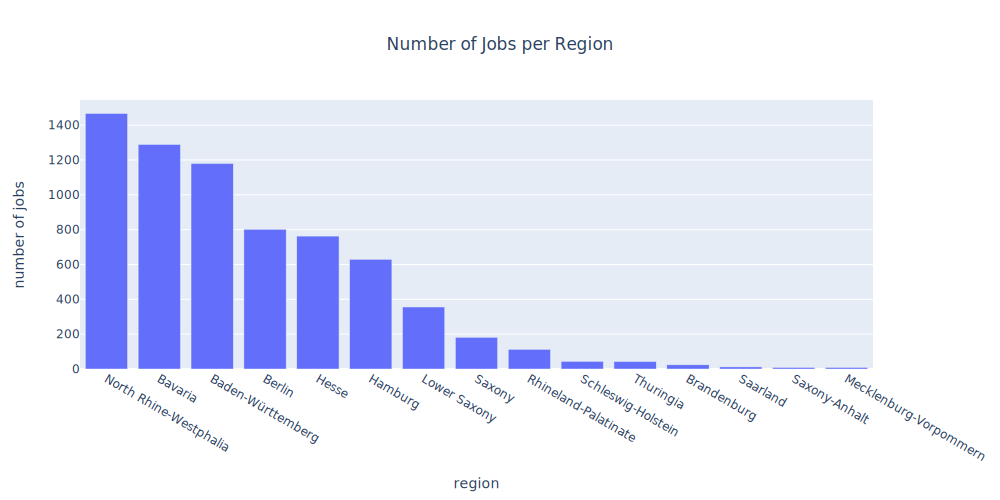

In [32]:
fig = px.bar(df_long["region"].value_counts(), labels={"value": "number of jobs", "index": "region"}, width=1000, height=500,
             title="Number of Jobs per Region")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

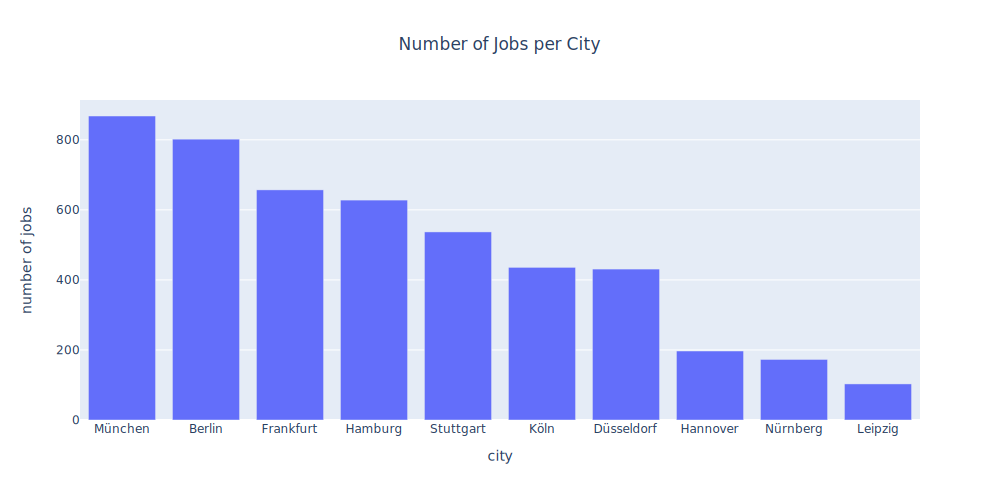

In [33]:
fig = px.bar(df_long["location"].value_counts().head(10), labels={"value": "number of jobs", "index": "city"}, width=1000, height=500,
             title="Number of Jobs per City")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

In [34]:
df_map = df_long.groupby(["location", "latitude", "longitude"], as_index=False)["link"].agg({"number of jobs": "count"})

df_map["size"] = np.log(df_map["number of jobs"] + 1)

fig = px.scatter_mapbox(df_map,
                        lat="latitude", lon="longitude",
                        hover_name="location",
                        hover_data={"latitude": False, "longitude": False, "size": False, "number of jobs": True},
                        color_discrete_sequence=["blue"],
                        mapbox_style="carto-positron",
                        size="size",
                        size_max=20,
                        zoom=5,
                        opacity=0.5,
                        center={"lat": 51, "lon": 10},
                        width=650, height=750,
                        title="Geographical Distribution of Jobs")

# Scatter mapbox does not render in Github
# fig.update_layout(title={"x": 0.5})
# fig.show()

<a id="company"></a>

## Which companies search the most for new data roles?

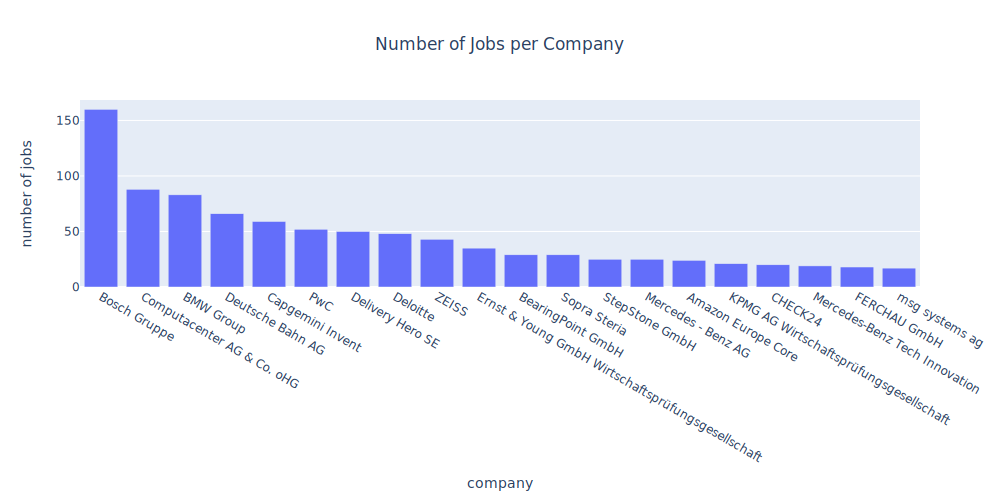

In [35]:
fig = px.bar(df_wide["company"].value_counts()[:20], labels={"value": "number of jobs", "index": "company"}, width=1000, height=500,
             title="Number of Jobs per Company")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

<a id="salary"></a>

## Which attributes influence the salary of a job?

The salary data used are not real salaries but already forecasts of a machine learning model developed by Stepstone. According to Stepstone, the forecasts of this model are based on three factors:
- job characteristics
- employer profile
- qualifications

In [36]:
df_salary = df_wide.loc[df_wide["average_salary"].notnull()]
df_salary.shape

(1673, 103)

### Influence of the job characteristics

Job characteristics include:
- job title
- experience level
- work type / contract type

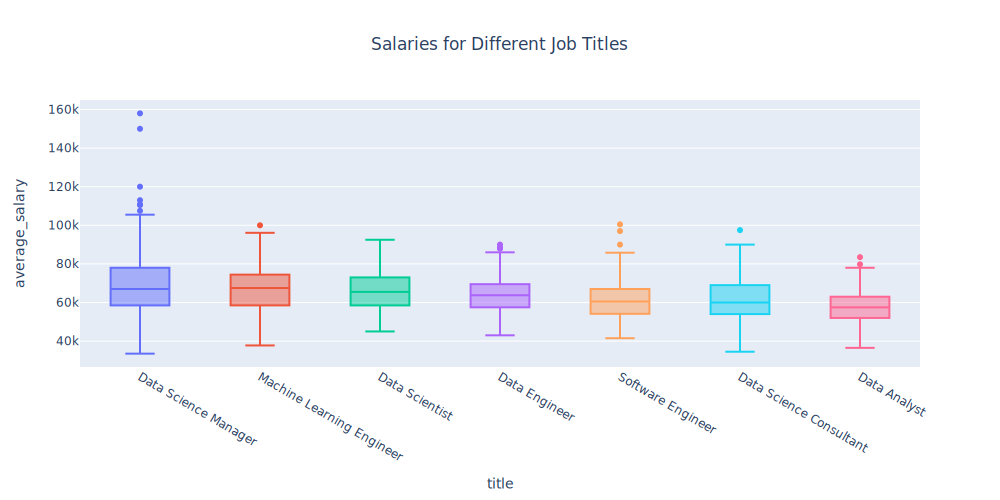

In [37]:
salaries = df_salary.groupby("title_category")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary, x="title_category", y="average_salary", color="title_category", labels={"title_category": "title"},
             width=1000, height=500, category_orders={"title_category": salaries.index}, title="Salaries for Different Job Titles")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

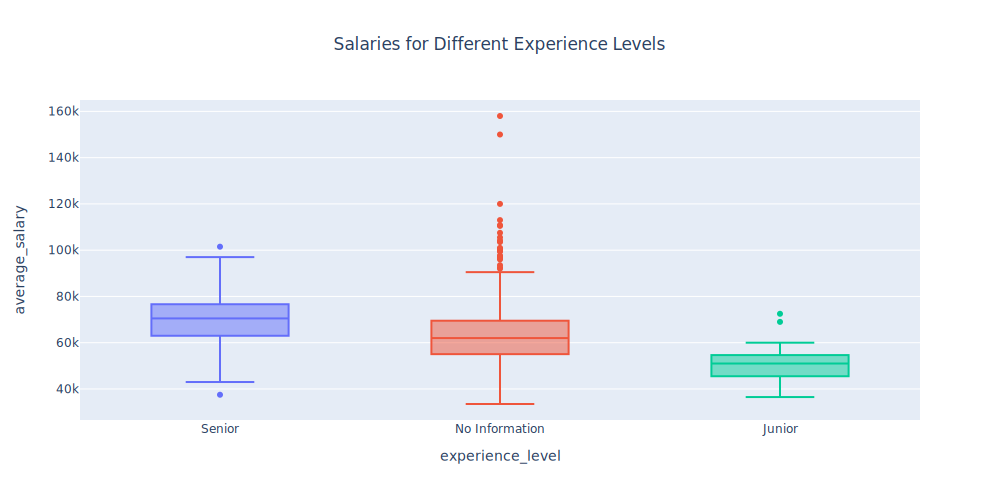

In [38]:
salaries = df_salary.groupby("experience_level")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary, x="experience_level", y="average_salary", color="experience_level", width=1000, height=500,
             category_orders={"experience_level": salaries.index}, title="Salaries for Different Experience Levels")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

In addition to the job title, other information is included in the job ads:
- contract type (permanent employment / trainee)
- work type (full time, part time, home office possible)

However, for many of these, the sample collected is too small to draw conclusions.

In [39]:
salaries = df_salary.groupby("permanent_employment")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
permanent_employment,,
True,63759.327153,1672
False,72000.000000,1


In [40]:
salaries = df_salary.groupby("trainee")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
trainee,,
False,63791.723621,1668
True,54600.000000,5


In [41]:
salaries = df_salary.groupby("full_time")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
full_time,,
True,63760.224282,1672
False,70500.000000,1


In [42]:
salaries = df_salary.groupby("part_time")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
part_time,,
False,63698.831254,1523
True,64428.500000,150


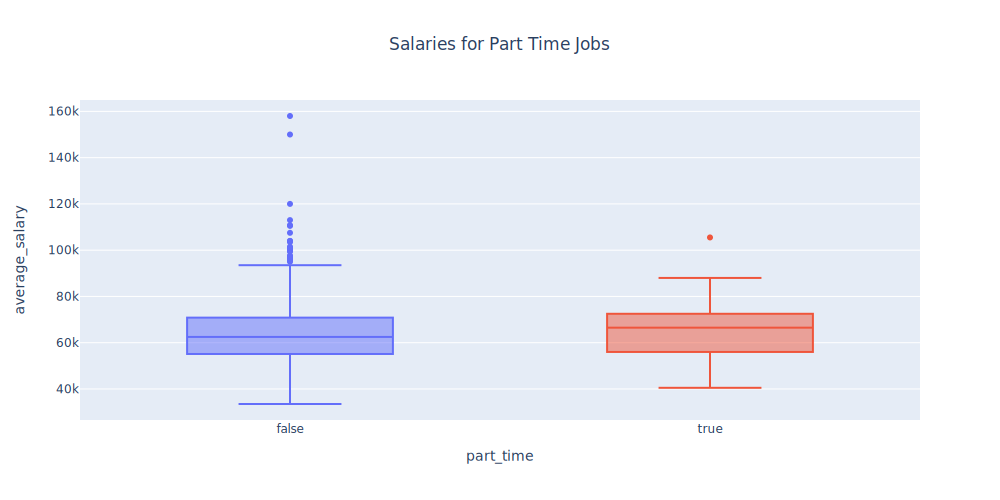

In [43]:
fig = px.box(df_salary, x="part_time", y="average_salary", color="part_time", width=1000, height=500,
             category_orders={"experience_level": salaries.index}, title="Salaries for Part Time Jobs")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

In [44]:
salaries = df_salary.groupby("home_office_possible")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
home_office_possible,,
False,65339.583333,972
True,61579.914408,701


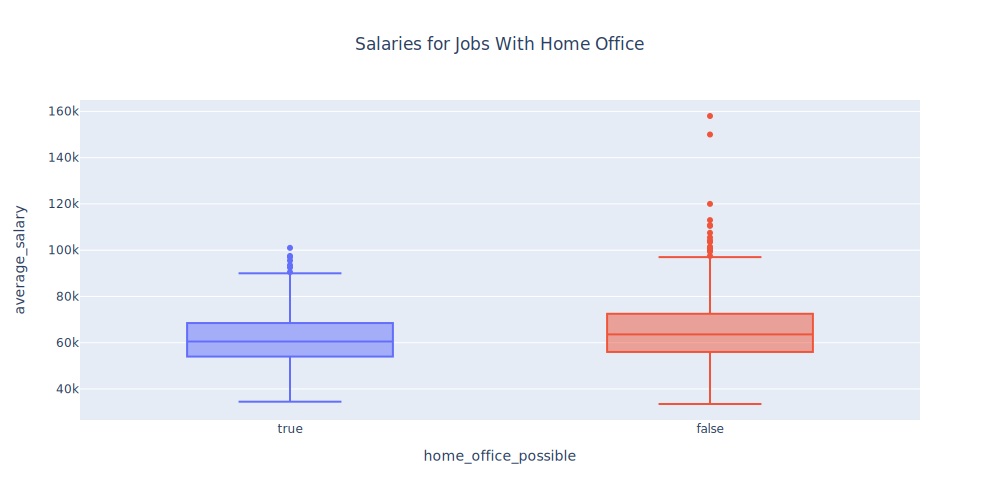

In [45]:
fig = px.box(df_salary, x="home_office_possible", y="average_salary", color="home_office_possible", width=1000, height=500,
             category_orders={"experience_level": salaries.index}, title="Salaries for Jobs With Home Office")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

Summary:
- the job title has a great influence on the salary
- the higher the experience level, the higher the salary
- for the features "permanent_employment", "trainee" and "full_time" there are too few data points for the respective weaker represented category to integrate these features into the later model.
    - the information from "trainee" has already been integrated into the "experience" feature during preprocessing
- for the feature "part_time" does not seem to make a big difference
- jobs without the possibility of a home office are on average paid better

### Influence of the employee profile

Employer profile includes:
- location information
- line of business
- company size

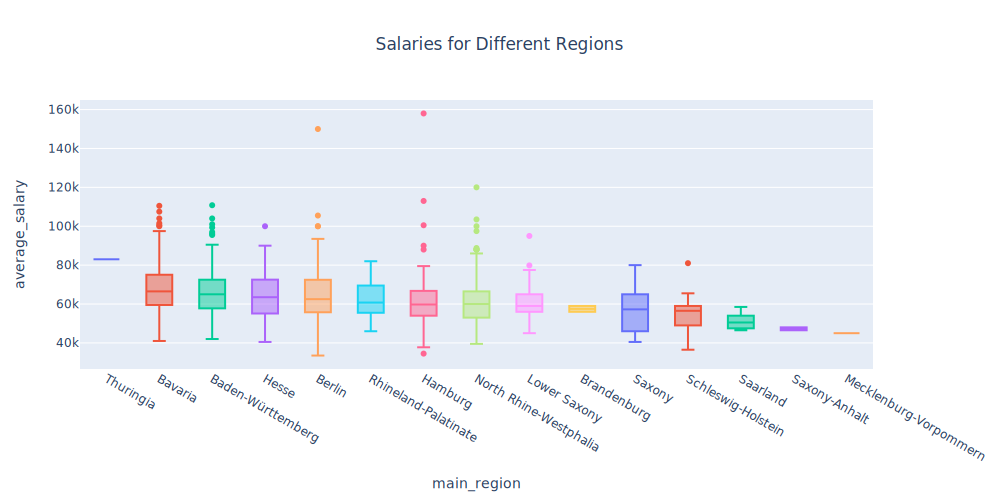

In [46]:
salaries = df_salary.groupby("main_region")["average_salary"].agg(["mean", "count"]).sort_values("mean", ascending=False)
fig = px.box(df_salary.dropna(subset=["main_region"]), x="main_region", y="average_salary", color="main_region", 
             width=1000, height=500, category_orders={"main_region": salaries.index}, title="Salaries for Different Regions")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

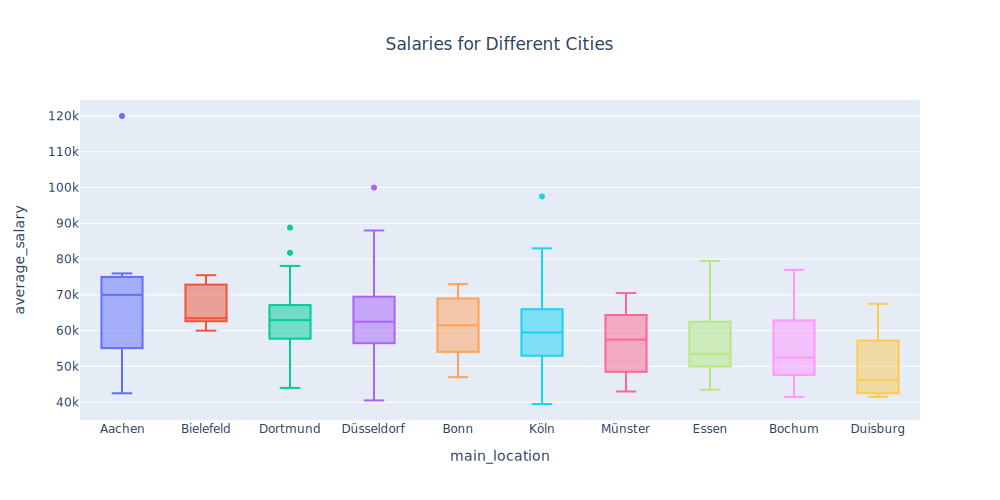

In [47]:
locations = df_salary.loc[df_salary["main_region"]=="North Rhine-Westphalia", "main_location"].value_counts().head(10)
top_locations = df_salary.loc[df_salary["main_location"].isin(locations.index)]
salaries = top_locations.groupby("main_location")["average_salary"].agg(["mean", "count"]).sort_values("mean", ascending=False)
fig = px.box(top_locations, x="main_location", y="average_salary", color="main_location", width=1000, height=500,
             category_orders={"main_location": salaries.index}, title="Salaries for Different Cities")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

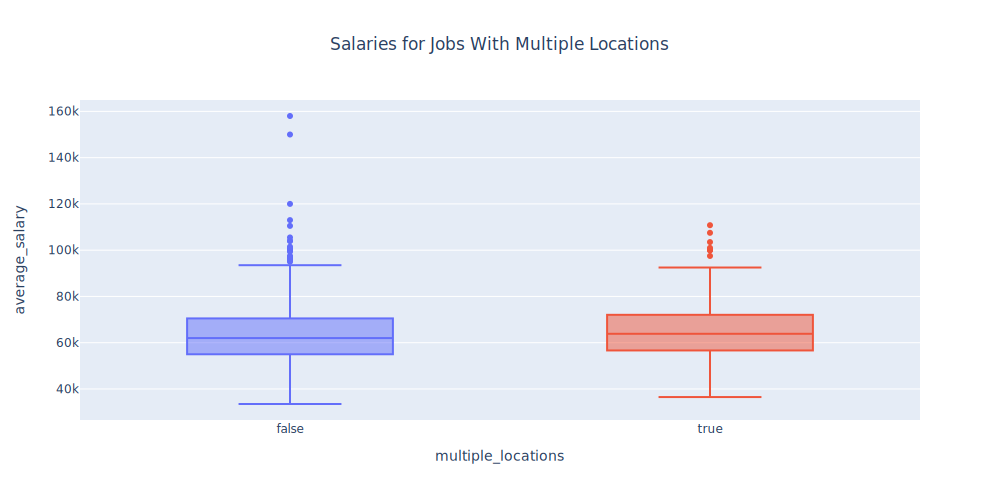

In [48]:
salaries = df_salary.groupby("multiple_locations")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary, x="multiple_locations", y="average_salary", color="multiple_locations", width=1000, height=500,
             title="Salaries for Jobs With Multiple Locations")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

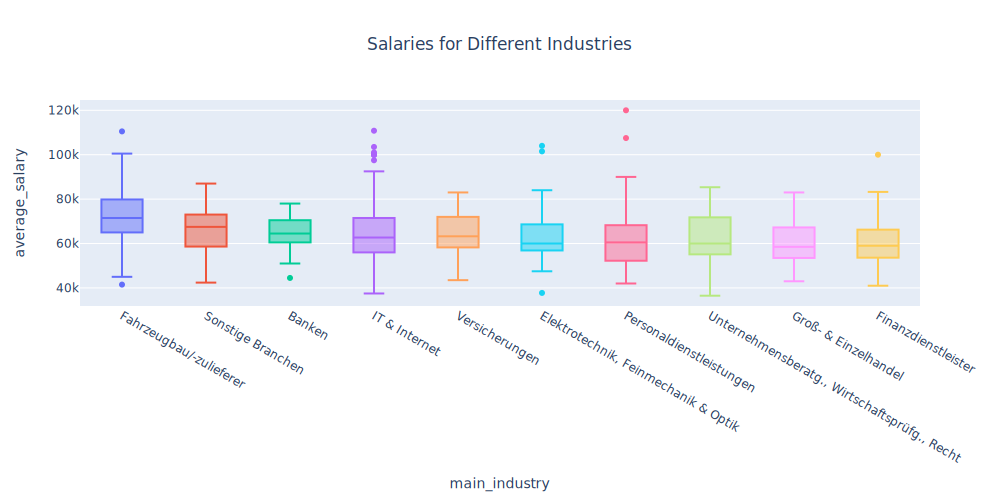

In [49]:
industries = df_salary["main_industry"].value_counts().head(10)
top_industries = df_salary.loc[df_salary["main_industry"].isin(industries.index)]
salaries = top_industries.groupby("main_industry")["average_salary"].agg(["mean", "count"]).sort_values("mean", ascending=False)
fig = px.box(top_industries, x="main_industry", y="average_salary", color="main_industry", width=1000, height=500,
             category_orders={"main_industry": salaries.index}, title="Salaries for Different Industries")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

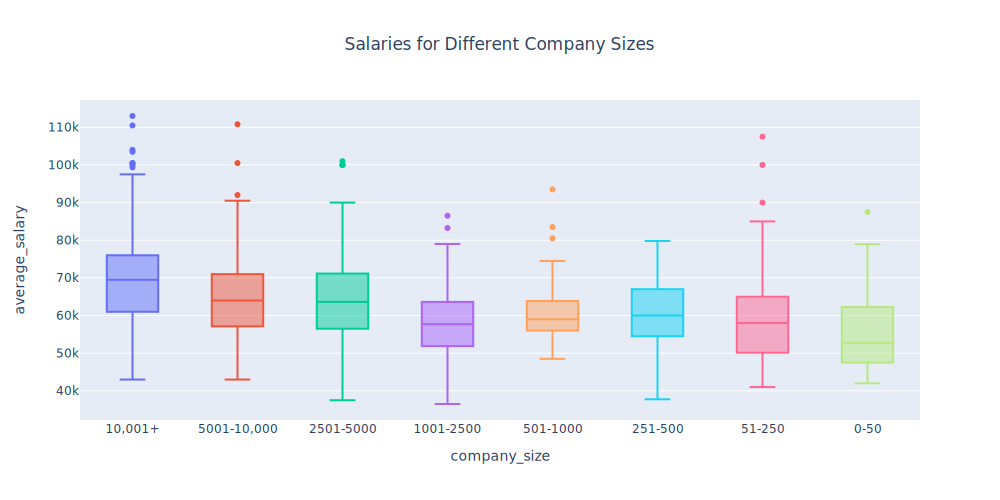

In [50]:
salaries = df_salary.groupby("company_size")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary.dropna(subset=["company_size"]), x="company_size", y="average_salary", color="company_size", width=1000, height=500,
             category_orders={"company_size": ["10,001+", "5001-10,000", "2501-5000", "1001-2500", "501-1000", "251-500", "51-250", "0-50"]},
             title="Salaries for Different Company Sizes")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

In [51]:
fig = px.scatter(df_salary, x="rating", y="average_salary", width=1000, height=500, trendline="ols",
                 title="Relationship Between Rating and Salary")

# Scatterplot does not render in Github
# fig.update_layout(showlegend=False, title={"x": 0.5})
# fig.show()

Summary:
- both the states and the cities themselves have a large impact on the salary
- in both cases, however, many rare categories exist ==> in the later model, pay attention to enough regularization to not overfit on this one
- also with the feature "multiple_locations" exists a small difference
    - whether this effect is based on this feature or can be explained by other features is not possible to judge
- for the industry of a company also has an influence on the salary
- larger companies pay on average larger salaries
- the rating of a company does not seem to correlate with the paid salaries

### Influence of the required qualifications

Required qualifications include:
- amount of work experience
- type of degree
- field of study

Since Stepstone's model also has to make predictions for completely different career fields than Data Science, it is very unlikely that these models include Data-Science-specific tools in its predictions. Therefore, extracted skills such as Python or SQL are not considered in this analysis.

In [52]:
def get_salary(s):
    return np.where(s, df_salary["average_salary"], np.nan)

In [53]:
df_experience = df_salary[["little_experience", "some_experience", "much_experience", "no_experience_information"]]
df_experience = df_experience.apply(get_salary)
df_experience.head()

,little_experience,some_experience,much_experience,no_experience_information
1,NaN,NaN,NaN,59500.0
2,NaN,NaN,NaN,62500.0
3,NaN,NaN,86000.0,NaN
4,NaN,NaN,NaN,61000.0
8,NaN,NaN,NaN,78000.0


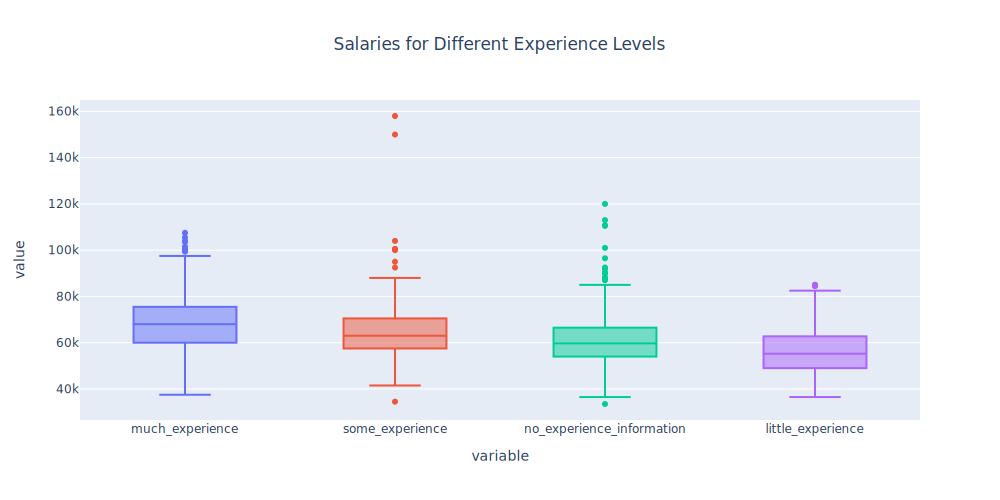

In [54]:
salaries = df_experience.mean().sort_values(ascending=False)
fig = px.box(df_experience, width=1000, height=500, color="variable", category_orders={"variable": salaries.index},
             title="Salaries for Different Experience Levels")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

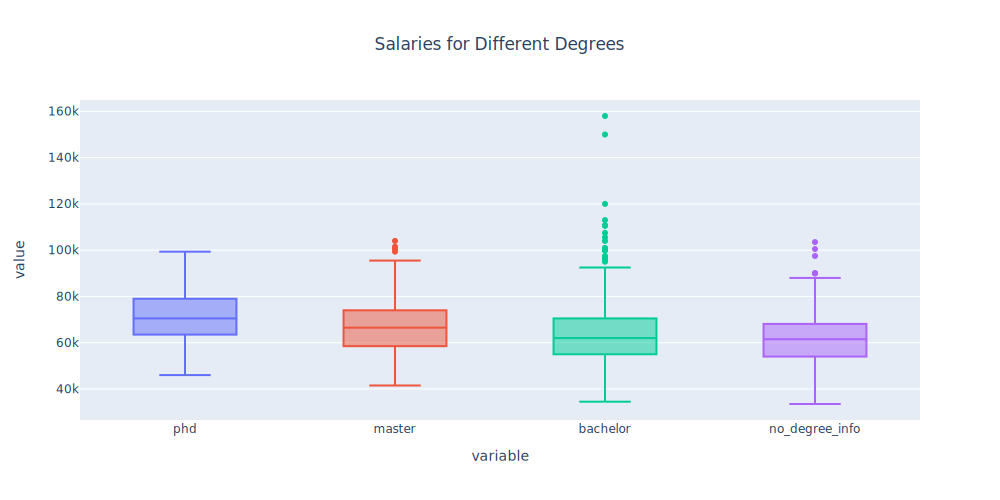

In [55]:
df_education = df_salary[["master", "phd", "bachelor", "no_degree_info"]]
df_education = df_education.apply(get_salary)

salaries = df_education.mean().sort_values(ascending=False)
fig = px.box(df_education, width=1000, height=500, color="variable", category_orders={"variable": salaries.index},
             title="Salaries for Different Degrees")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

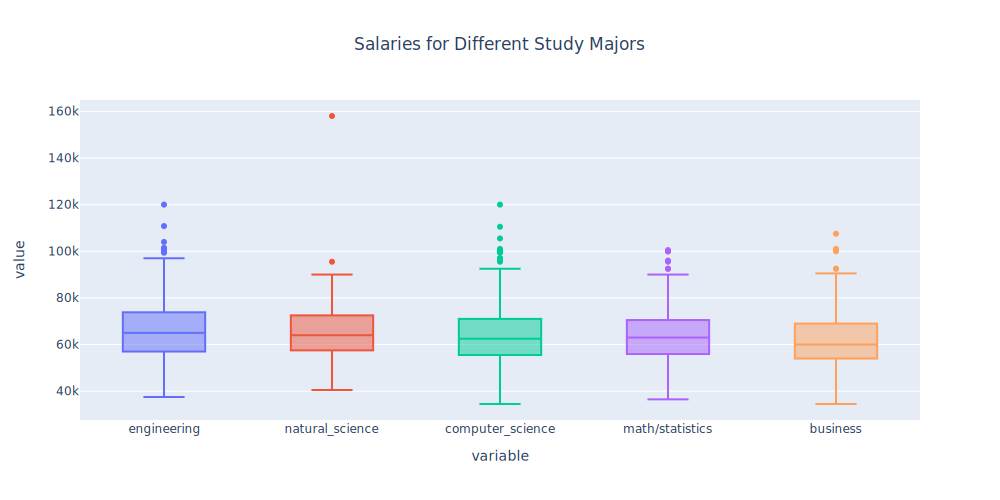

In [56]:
df_degree = df_salary[["computer_science", "math/statistics", "natural_science", "engineering", "business"]]
df_degree = df_degree.apply(get_salary)

salaries = df_degree.mean().sort_values(ascending=False)
fig = px.box(df_degree, width=1000, height=500, color="variable", category_orders={"variable": salaries.index},
             title="Salaries for Different Study Majors")
fig.update_layout(showlegend=False, title={"x": 0.5})
fig.show("svg")

Summary:
- the greater the work experience, the higher the salary
- the higher the degree, the higher the salary
- the average salaries between different study programs differ minimally
    - however, it does not look like the distributions differ significantly for the different study programs (study program was probably not integrated to the model)